## Chemicals Segregation

## Can you Separate the chemicals?

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# Load dataset

X_train = pd.read_csv('Logistic_X_Train.csv').values
Y_train = pd.read_csv('Logistic_Y_Train.csv').values
X_test = pd.read_csv('Logistic_X_Test.csv').values

print(X_train.shape, Y_train.shape, X_test.shape)

# Add column of 1's for bias

X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

(3000, 3) (3000, 1) (1000, 3)


In [3]:
# Algorithm

def hypothesis(x, theta):
    val = np.dot(x, theta)
    val = 1/(1+np.exp(-1*val))
    return val

def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros(theta.shape[0])
    for i in range(m):
        h = hypothesis(X[i], theta)
        grad += (h - Y[i])*X[i]
    return grad/m

def loss(X, Y, theta):
    e = 0.0
    m = X.shape[0]
    for i in range(m):
        h = hypothesis(X[i], theta)
        e += -((Y[i]*np.log2(h)) + ((1-Y[i])*np.log2(1-h)))
    return e/m
        
def grad_desc(X, Y, lr=0.1, max_itr=100):
    theta = np.zeros(X.shape[1])
    error = []
    for i in range(max_itr):
        grad = gradient(X, Y, theta)
        theta = theta - lr*grad
        error.append(loss(X, Y, theta))
    return theta, error

def predict(X, theta):
    val = hypothesis(X, theta)
    val = [0 if x < 0.5 else 1 for x in val]
    return np.array(val)

[-0.80950522 -1.70854261  0.85049432 -1.88512722]


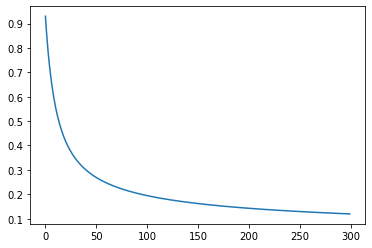

In [4]:
# Training dataset

theta, error = grad_desc(X_train, Y_train, max_itr=300)

print(theta)
plt.plot(error)
plt.show()

In [5]:
# Make predictions on test data

y_pred = predict(X_test, theta)
pd.DataFrame(y_pred, columns=['label']).to_csv('y_pred.csv', index=False)